 **<center> Lab 1: Logdanidis Pavlos 2071,Vasilopoulos Vasileios 2024**

# Minimization of squared error

Given a set of points $(x_i,y_i)$ , $i=1,2,...,n+1$ we want to find a polynomial of order $m < n$ , $y = \Phi_m(x)$ that "fits" our points optimally.We are going to do that by minimizing the squared error between our given points and and the polynomial's values.

<center>
$(min)E = \sum_{j=1}^{n+1} (y_j -\Phi_m(x_j) )^2$
</center>

In the case of **Linear Regression** , $y=\Phi_1(x)=c_1x +c_2$ and the total error is: 

<center>$E = \sum_{j=1}^{n+1} (y_j-c_1x_j-c_2)^2)$ </center>

The coefficients $c_1 , c_2$ for minimizing the total error are given by the system:

<center> $\frac{\partial E}{\partial c_1} = -2\sum_{j=1}^{n+1}x_j(y_j-c_1x_j-c_2)$ </center>

<center> $\frac{\partial E}{\partial c_2} = -2\sum_{j=1}^{n+1}(y_j-c_1x_j-c_2)$ </center>

We are going to implement this method for a set of points using Octave,R and Python (with the help of Numpy).

## Octave

x =

   0.10000   0.40000   0.50000   0.70000   0.70000   0.90000

y =

   0.61000   0.92000   0.99000   1.52000   1.47000   2.03000

c =

   1.76456
   0.28616



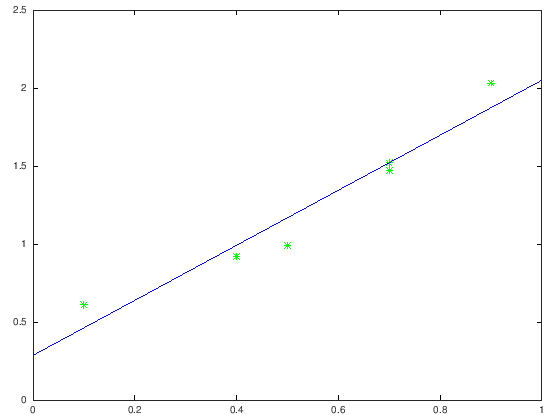

In [1]:
x = [ 0.1,0.4,0.5,0.7,0.7,0.9 ]
y = [ 0.61,0.92,0.99,1.52,1.47,2.03]
a11 = sum(x.^2); a12 = sum(x); a21 = sum(x); a22 =sum(ones(1,length(x)));
A = [ a11,a12; a21,a22]; % the coefficient matrix of the minimization
#problem
b1 = sum(x.*y); b2 = sum(y);
b = [ b1; b2 ]; % right-hand-side of the minimization problem
c = A \ b % solution of the minimization problem
xApr = 0 : 0.001 : 1; yApr = c(1)*xApr + c(2);
plot(x,y,'*g',xApr,yApr,'b'); 

## R

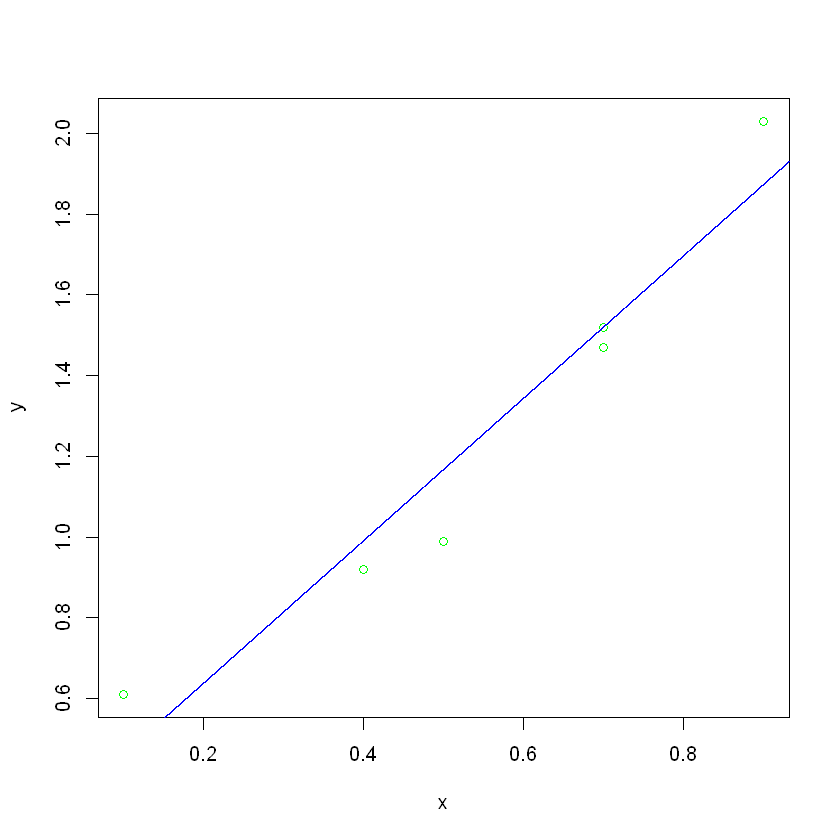

In [1]:
x <- c( 0.1,0.4,0.5,0.7,0.7,0.9 )
y <- c( 0.61,0.92,0.99,1.52,1.47,2.03)

a11=sum(x^2); a12=sum(x)
a21=sum(x); a22=sum(matrix(1,1,length(x)))
A=matrix(c(a11,a12,a21,a22),nrow=2,ncol=2) # the coefficient matrix of the minimization problem


b1 =sum(x*y)
b2 =sum(y)
b =matrix(c(b1,b2),2,1)
c=solve(A,b)

xApr=seq(0,1,0.00001)
yApr=c[1]*xApr +c[2]
#plot(x,y,'*g',xApr,yApr,'b'); 
plot(x,y,col="green")
lines(xApr,yApr,'l',col="blue")

## Python

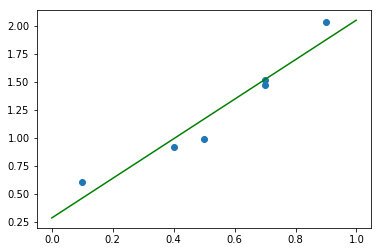

In [2]:
import numpy as np
import matplotlib.pyplot as pt   

x =np.array([ 0.1,0.4,0.5,0.7,0.7,0.9 ])
y= np.array([ 0.61,0.92,0.99,1.52,1.47,2.03])
#a11 = sum(x.^2); a12 = sum(x); a21 = sum(x); a22 =sum(ones(1,length(x)));
a11 = np.sum(x**2)
a12 = np.sum(x)
a21 = np.sum(x)
a22 = np.sum(np.ones((1,x.shape[0])))
A = np.array([[a11,a12],[a21,a22]])

b1 = np.sum(x*y)
b2 = np.sum(y)
b= np.array([b1,b2])
c= np.linalg.solve(A,b)

xApr=np.arange(0,1,0.001)
yApr = xApr*c[0] + c[1]

pt.plot(x,y,'o')
pt.plot(xApr,yApr,'g')
pt.show()

# Overdetermined  Linear System

If our polynomial $y = \Phi_m(x)$ is passing through all our points , we have a system where the number of equations ($n+1$) is greater than the number of variables ($m+1$).Since the coefficient matrix A is singular, there is no solution to this system.

However,if we multiply both sides by $A^T$  we get :
<center> $(A^TA)c = (A^T*b)$ </center>
Since  $(A^TA)$ is a 2 by 2 invertible matrix , there is a single solution for $c$ which is the same as the one given by minimizing the total squared error.

## Octave

c =

   1.76456
   0.28616

A =

   0.10000   1.00000
   0.40000   1.00000
   0.50000   1.00000
   0.70000   1.00000
   0.70000   1.00000
   0.90000   1.00000

b =

   0.61000
   0.92000
   0.99000
   1.52000
   1.47000
   2.03000

c =

   1.76456
   0.28616

E =  0.085637


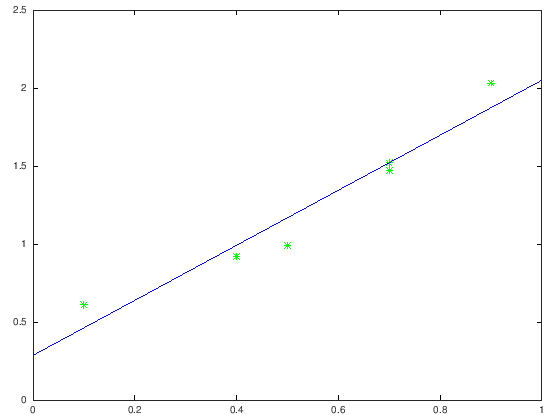

In [4]:
x = [ 0.1,0.4,0.5,0.7,0.7,0.9 ];
y = [ 0.61,0.92,0.99,1.52,1.47,2.03];
A = [ x', ones(length(x),1) ];
b = y'; 
c = (A'*A) \ (A'*b) % solution of the over-determined problem
xApr = 0 : 0.001 : 1; yApr = c(1)*xApr + c(2);
plot(x,y,'*g',xApr,yApr,'b');
A, b, c = A\b
% Octave solves the over-determined system in the least square sense
E = sum((y-c(1)*x-c(2)).^2)

The squared error gets smaller as the order $m$ of the approximation polynomial $y =\Phi_m(x)$ increases.If $m=n$,  the error is 0.

A =

   0.10000   1.00000
   0.40000   1.00000
   0.50000   1.00000
   0.70000   1.00000
   0.70000   1.00000
   0.90000   1.00000

c =

   1.76456
   0.28616

m = 1, E = 0.08564
A =

   0.010000   0.100000   1.000000
   0.160000   0.400000   1.000000
   0.250000   0.500000   1.000000
   0.490000   0.700000   1.000000
   0.490000   0.700000   1.000000
   0.810000   0.900000   1.000000

c =

   1.729547
   0.059092
   0.587116

m = 2, E = 0.00665
A =

   0.0010000   0.0100000   0.1000000   1.0000000
   0.0640000   0.1600000   0.4000000   1.0000000
   0.1250000   0.2500000   0.5000000   1.0000000
   0.3430000   0.4900000   0.7000000   1.0000000
   0.3430000   0.4900000   0.7000000   1.0000000
   0.7290000   0.8100000   0.9000000   1.0000000

c =

  -0.44179
   2.39815
  -0.21796
   0.61141

m = 3, E = 0.00646
A =

   0.00010000   0.00100000   0.01000000   0.10000000   1.00000000
   0.02560000   0.06400000   0.16000000   0.40000000   1.00000000
   0.06250000   0.12500000   0.25000000   0.

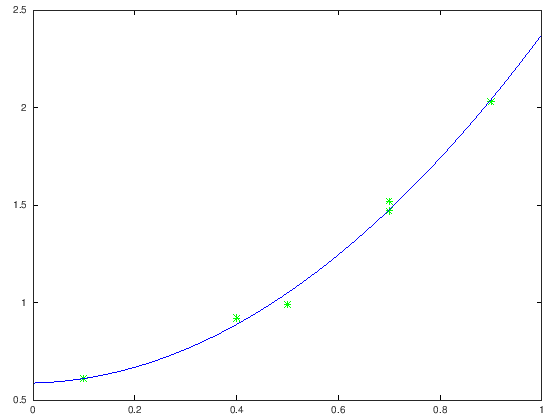

In [5]:
x = [ 0.1,0.4,0.5,0.7,0.7,0.9 ];
y = [ 0.61,0.92,0.99,1.52,1.47,2.03];
n = length(x)-1;
for m = 1 : n
    A = vander(x); 
    A = A(:,n-m+1:n+1);
    A
    b = y';
    c = A\b; 
    c
    yy = polyval(c,x);
    E = sum((y-yy).^2) ;
    fprintf('m = %d, E = %6.5f\n',m,E);
end
m = 2;
A = vander(x); 
A = A(:,n-m+1:n+1);
b = y';
c = A\b; 
xApr = 0 : 0.001 : 1;
yApr = polyval(c,xApr);
plot(x,y,'*g',xApr,yApr,'b'); 

In [6]:
c = polyfit(x,y,1) 

c =

   1.76456   0.28616



## R

[1] 0.08563713


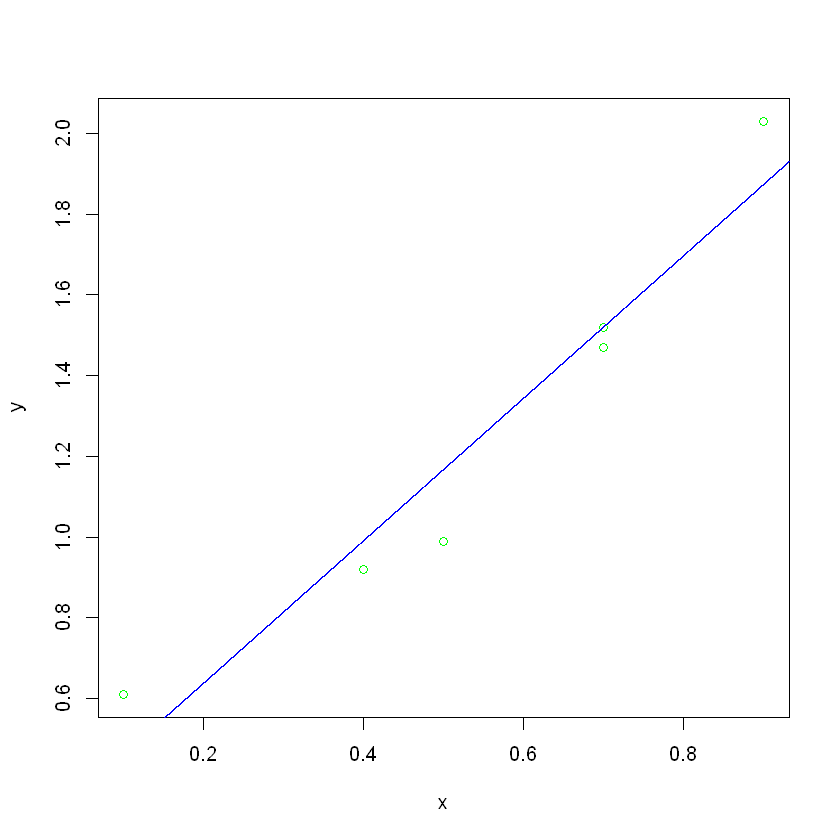

In [2]:
x <-c(0.1,0.4,0.5,0.7,0.7,0.9)
y <-c(0.61,0.92,0.99,1.52,1.47,2.03)
onesColumn=matrix(1,length(x),1)
A = cbind(x,onesColumn)
b=y;
c =solve(t(A) %*% A,t(A) %*% b)
xApr=seq(0,1,0.00001)
yApr=c[1]*xApr +c[2]
#plot(x,y,'*g',xApr,yApr,'b'); 
plot(x,y,col="green")
lines(xApr,yApr,'l',col="blue")
E = sum((y-c[1]*x-c[2])^2)
print(E)

m = 1, E = 0.08564
m = 2, E = 0.00665
m = 3, E = 0.00646
m = 4, E = 0.00125
m = 5, E =     NA
              y
[1,] 1.72954749
[2,] 0.05909178
[3,] 0.58711620


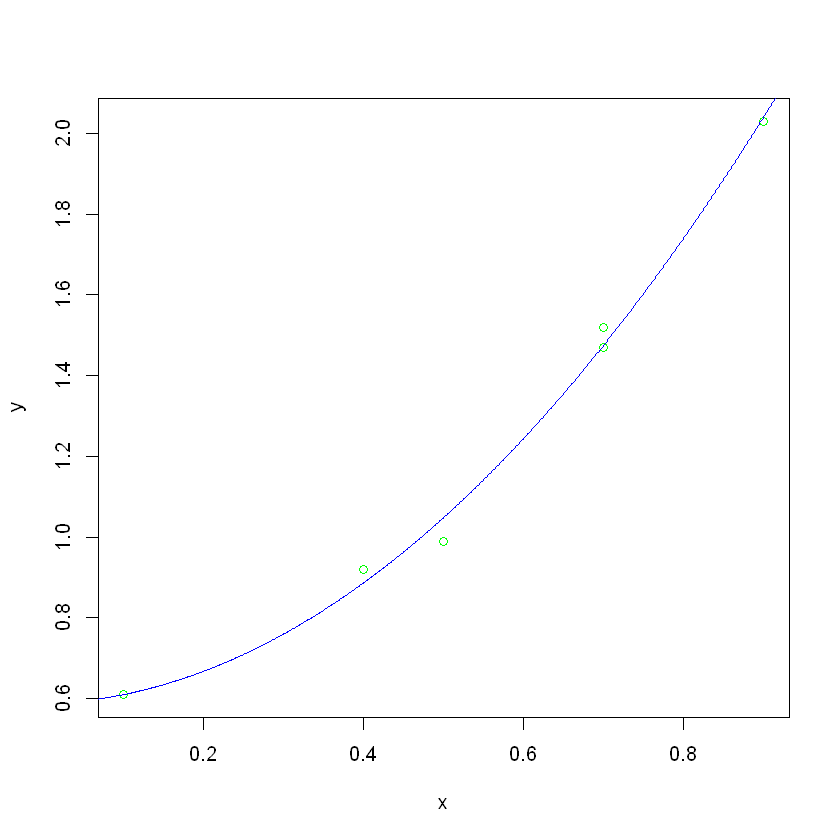

In [3]:
library("matrixcalc")
library("pracma")
x <- c(0.1,0.4,0.5,0.7,0.7,0.9)
y <- c(0.61,0.92,0.99,1.52,1.47,2.03)
n <- length(x)-1

for (m in 1:n) {
    A <- vandermonde.matrix(x,n+1)
    A <- A[,(n+m-4):1]
    b <- cbind(y)
    c <- qr.coef(qr(A), b)
    complex <- complex(real = c, imag = 0)
    yy <- polyval(complex,x)
    E <- sum((y-yy)^2) 
    fprintf('m = %d, E = %6.5f\n',m,E)
    
}

    m=2
    A <- vandermonde.matrix(x,n+1)
    A <- A[,(n+m-4):1]
    b <- cbind(y)
    c <- qr.coef(qr(A), b)
    print(c)
    xApr<-seq(0,1,0.001)
    complex <- complex(real = c, imag = 0)
    yApr <- polyval( complex,xApr)
    plot(x,y,col="green")
    lines(xApr,yApr,'l',col="blue")
    


In [9]:
c <-polyfit(x,y,1)
c

ans =

  0  0

c =

   1.76456   0.28616



## Python

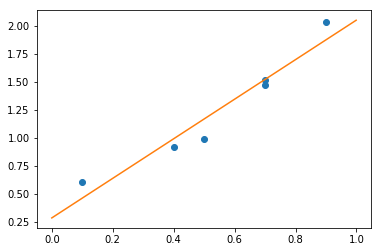

In [3]:
import numpy as np
import matplotlib.pyplot as pt   
import numpy.linalg as la

x = np.array( [ 0.1,0.4,0.5,0.7,0.7,0.9 ])
y = np.array( [ 0.61,0.92,0.99,1.52,1.47,2.03])
A = np.column_stack((x,np.ones((x.shape[0],1))))
b = y.reshape(x.size,1)
A_t= np.transpose(A)
c = la.solve(A_t.dot(A),A_t.dot(b))
xApr = np.arange(0,1,0.001)
yApr = c[0]*xApr + c[1]
pt.plot(x,y,"o")
pt.plot(xApr,yApr)
pt.show()

In [4]:
c = la.lstsq(A,b,rcond=None)[0]
print(c)
E =  np.sum((y-c[0]*x-c[1])**2)
print(E)

[[1.76455696]
 [0.28616034]]
0.08563713080168771


m = 2 E = 0.08563713080168771
m = 3 E = 0.006645704972516945
m = 4 E = 0.0064574187147000564
m = 5 E = 0.0012500000000000024
m = 6 E = 0.0012500000000000022


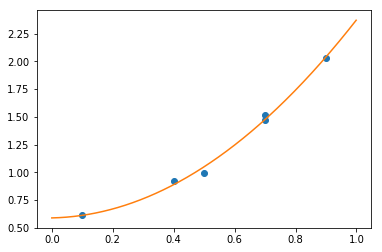

In [5]:
import numpy as np
import matplotlib.pyplot as pt   
import numpy.linalg as la


x = np.array( [ 0.1,0.4,0.5,0.7,0.7,0.9 ])
y = np.array( [ 0.61,0.92,0.99,1.52,1.47,2.03])
n = x.size -1
for m in range(2,n+2):
  A = np.vander(x)
  A = A[:,n-m+1:n+1]
  b = y.reshape(x.size,1)
  c = la.lstsq(A,b,rcond=None)[0]
  yy=np.polyval(c,x)
  E =  np.sum((y-yy)**2)
  print('m =', m, 'E =',E)
m=3
A = np.vander(x)
A = A[:,n-m+1:n+1]
b = y.reshape(x.size,1)
c = la.lstsq(A,b,rcond=None)[0]
xApr = np.arange(0,1,0.001)
yApr = np.polyval(c,xApr)
pt.plot(x,y,"o")
pt.plot(xApr,yApr)
pt.show()


In [14]:
c = np.polyfit(x,y,1)
c

array([1.00000000e+00, 1.45038929e-16])

# Non Linear Approximation

Many times theoretical data dependencies can be represented with non linear functions rather than polynomials.Some of these functions are *power and exponential* equations.

In these cases, the $(x,y)$ axes can be redefined so we can use a linear polynomial to approximate our non-linear functions via least squares.

**a)** If we use the power function $y = \beta x^\alpha$ , we can transform it to a linear equation in the axes $(logx,logy)$
<center> $logy=\alpha logx + log\beta$<center>
    
In the examples below , we implement this method in Octave,R and Python.

## Octave

c =

   0.20943   1.85880



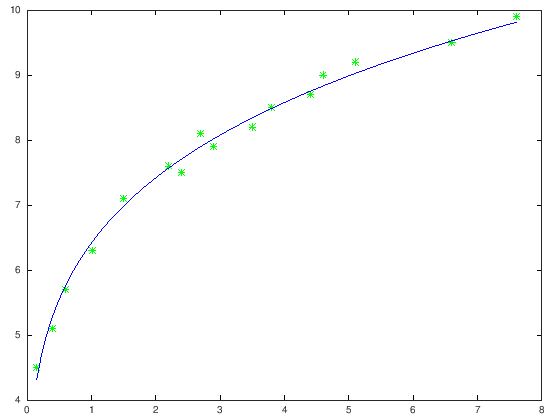

In [14]:
x = [0.15,0.4,0.6,1.01,1.5,2.2,2.4,2.7,2.9,3.5,3.8,4.4,4.6,5.1,6.6,7.6];
y = [4.5,5.1,5.7,6.3,7.1,7.6,7.5,8.1,7.9,8.2,8.5,8.7,9.0,9.2,9.5,9.9];
c = polyfit(log(x),log(y),1) % linear regression in logarithmic axis
xInt = linspace(x(1),x(length(x)),100);
yInt = exp(c(2))*xInt.^(c(1));
plot(x,y,'g*',xInt,yInt,'b'); % nonlinear regression in (x,y)


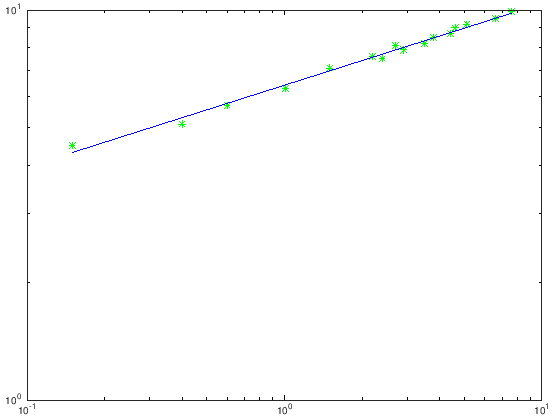

In [15]:
loglog(x,y,'g*',xInt,yInt,'b'); % linear regression in (logx,logy) 

## R

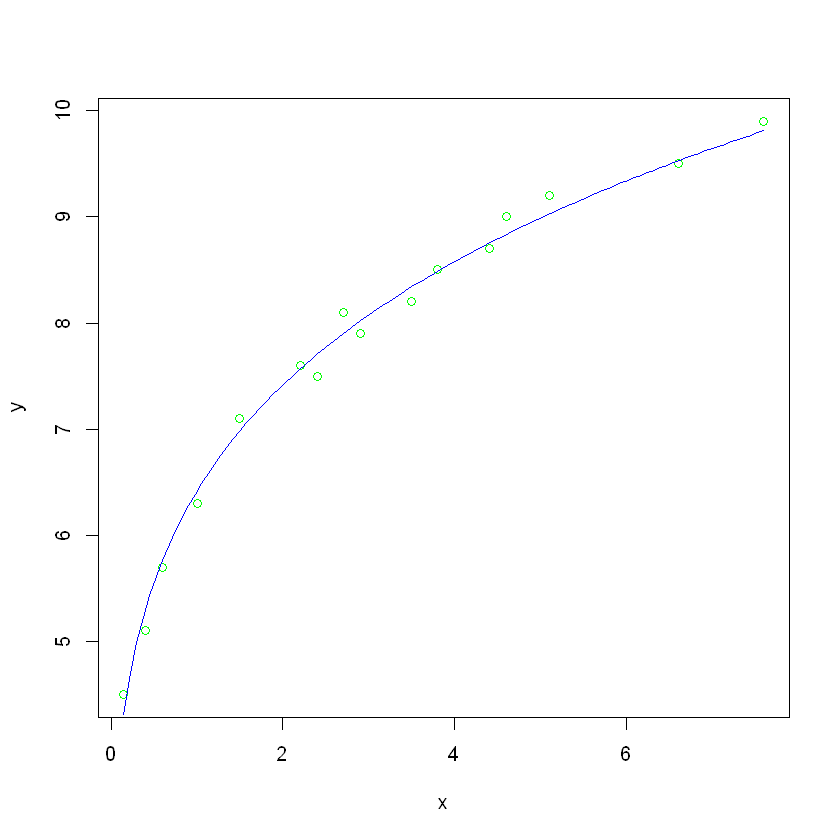

In [2]:
library("matrixcalc")
library("pracma")
x <- c(0.15,0.4,0.6,1.01,1.5,2.2,2.4,2.7,2.9,3.5,3.8,4.4,4.6,5.1,6.6,7.6)
y <- c(4.5,5.1,5.7,6.3,7.1,7.6,7.5,8.1,7.9,8.2,8.5,8.7,9.0,9.2,9.5,9.9)
c = polyfit(log(x),log(y),1)
xInt=seq(x[1],x[length(x)],length=100)
yInt=exp(c[2])*xInt^(c[1])

plot(x,y,col="green")
lines(xInt,yInt,col='blue')


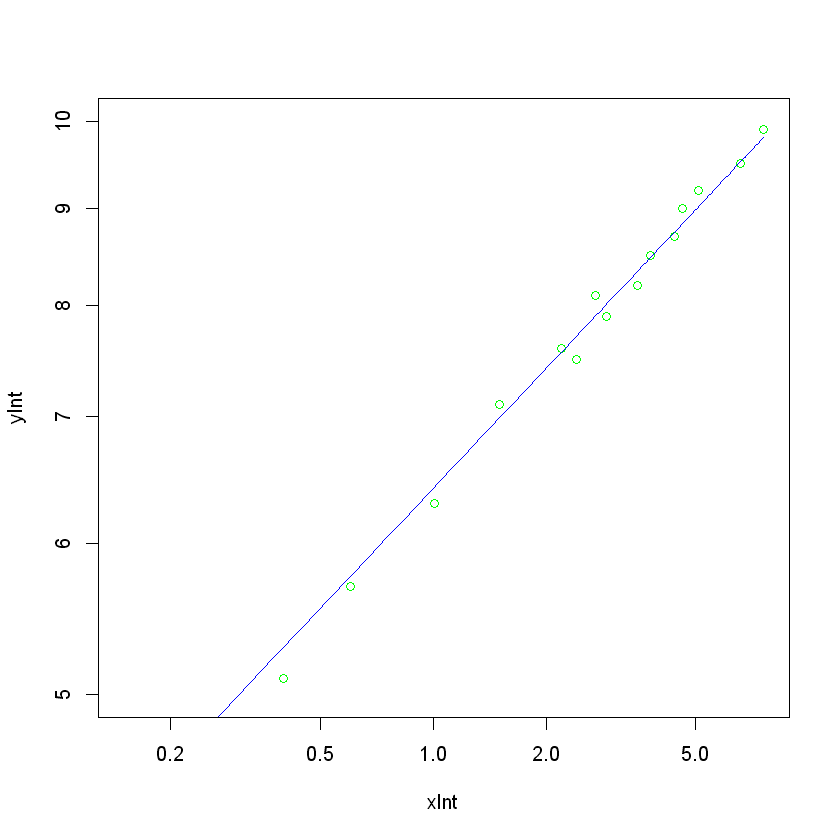

In [10]:
plot(x,y,col="green",log="xy",ylim=c(5,10),xlab = "",ylab = "")
par(new=TRUE)
plot(xInt,yInt,col="blue",log="xy",type="l",ylim=c(5,10))


## Python

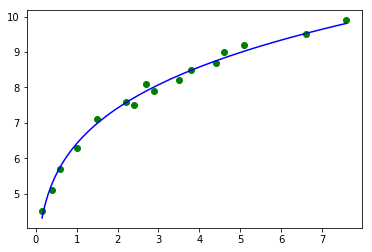

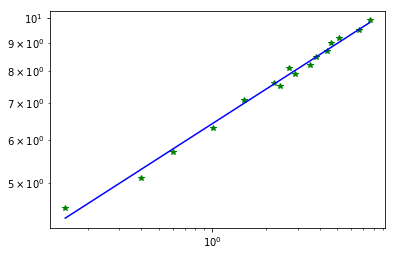

In [6]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([0.15,0.4,0.6,1.01,1.5,2.2,2.4,2.7,2.9,3.5,3.8,4.4,4.6,5.1,6.6,7.6])
y = np.array([4.5,5.1,5.7,6.3,7.1,7.6,7.5,8.1,7.9,8.2,8.5,8.7,9.0,9.2,9.5,9.9])
c = np.polyfit(np.log(x),np.log(y),1)
xInt = np.linspace(x[0],x[x.size-1],100)
yInt =np.exp(c[1])*xInt**c[0]
plt.plot(x,y,'go')
plt.plot(xInt,yInt,'b')
plt.show()
plt.loglog(x,y,'g*',xInt,yInt,'b')

**b)** If we use the exponential equation $y=\beta e^{ax}$ , we take the logarithm of the function:
<center>$logy = \alpha x + log \beta$</center>
    In semilogarithmic axes $(x,logy)$ , the data sample can be approximated with a linear polynomial.

**c)** If we approximate our data with a linear combination of non linear functions: <center> $y = c_1 f_1(x) + c_2 f_2(x) + ... + c_n f_n(x)$  </center>  we will have to solve a complex non linear optimization problem.

# Polyfit

The examples below writen in Octave ,R and Python fit polynomials of orders 1 , 3 and 30 to our data points and calculate their error
<center>$ E_2(f) = (\frac{1}{n} \sum_{k=1}^m |f(x_k)-y_k|^2)^{1/2} $<center>

## Octave

e1 =  20.497
e2 =  1.6001
e3 =  1.2544


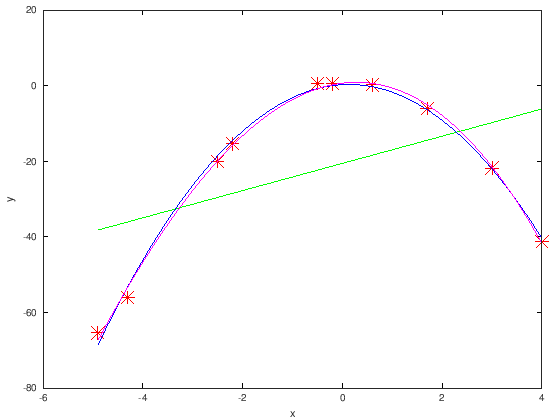

In [19]:
x = [ -2.5 3.0 1.7 -4.9 0.6 -0.5 4.0 -2.2 -4.3 -0.2];
y = [-20.1 -21.8 -6.0 -65.4 0.2 0.6 -41.3 -15.4 -56.1 0.5];
n=length(x);
sx=sum(x);sx2=sum(x.^2);
x1=min(x); x2=max(x); xx=x1:(x2-x1)/100:x2;
c1=polyfit(x,y,1);
ny1=polyval(c1,xx);
c2=polyfit(x,y,2);
ny2=polyval(c2,xx);
c3=polyfit(x,y,3);
ny3=polyval(c3,xx);
e1=sqrt( sum(abs(polyval(c1,x)-y).^2 )/n )
e2=sqrt( sum(abs(polyval(c2,x)-y).^2 )/n )
e3=sqrt( sum(abs(polyval(c3,x)-y).^2 )/n )
H=plot(x,y,'r*',xx,ny1,'g',xx,ny2,'b',xx,ny3,'m');
xlabel('x'); ylabel('y');
set(H,'LineWidth',3,'MarkerSize',12);

## R

[1] 0.4991421
[1] 0.08132501
[1] 4.426513e-08


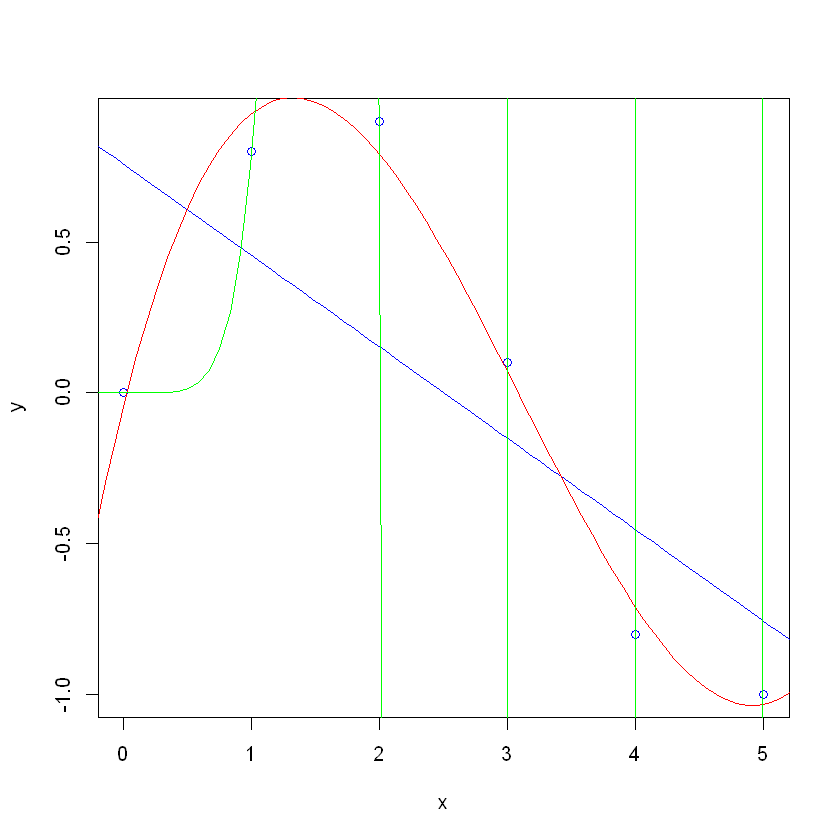

In [6]:
library("matrixcalc")
library("pracma")
x <- c(0.0, 1.0, 2.0, 3.0, 4.0, 5.0)
y <-c(0.0, 0.8, 0.9, 0.1, -0.8, -1.0)
n <-length(x)
xx <-seq(-2,6,length=100)
c1=polyfit(x,y,1)
ny1=polyval(c1,xx)
c2=polyfit(x,y,3)
ny2=polyval(c2,xx)
c3=polyfit(x,y,30)
ny3=polyval(c3,xx)
e1=sqrt( sum(abs(polyval(c1,x)-y)^2 )/n )
e2=sqrt( sum(abs(polyval(c2,x)-y)^2 )/n )
e3=sqrt( sum(abs(polyval(c3,x)-y)^2 )/n )
print(e1)
print(e2)
print(e3)


plot(x,y,col="blue")
par(new=TRUE)
lines( xx, ny1, 'l',col="blue")
par(new=TRUE)
lines( xx, ny2,col="red")
lines( xx, ny3,col="green")

## Python

0.49914212118679896
0.08132500607904435
2.4573983882716676e-15


C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


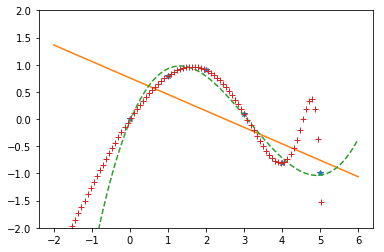

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
n=len(x)
xx= np.linspace(-2,6,100)
c1=np.polyfit(x,y,1)
ny1=np.polyval(c1,xx)
c2=np.polyfit(x,y,3)
ny2=np.polyval(c2,xx)
c3=np.polyfit(x,y,30)
ny3=np.polyval(c3,xx)
e1=sqrt( sum(abs(np.polyval(c1,x)-y)**2 )/n )
e2=sqrt( sum(abs(np.polyval(c2,x)-y)**2 )/n )
e3=sqrt( sum(abs(np.polyval(c3,x)-y)**2 )/n )
print(e1)
print(e2)
print(e3)
plt.plot(x, y, '*', xx, ny1, '-', xx, ny2, '--',xx, ny3, '+')
plt.ylim (-2, 2)
plt.show()

The warning we get indicates that the order of the polynomial we are using (30) might be too high and we should use a lower order polynomial to fit our data.Quoting the 
**numpy.polyfit** documentation:

*Note that fitting polynomial coefficients is inherently badly conditioned when the degree of the polynomial is large or the interval of sample points is badly centered. The quality of the fit should always be checked in these cases. When polynomial fits are not satisfactory, splines may be a good alternative.*

# Linear Regression

We are going to perform Linear Regression on the *iris* dataset from sklearn's datasets using the Moore-Penrose pseudoinverse approach.


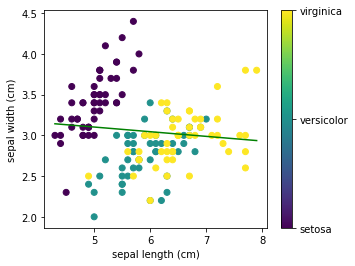

R squared = 0.0119616328347677


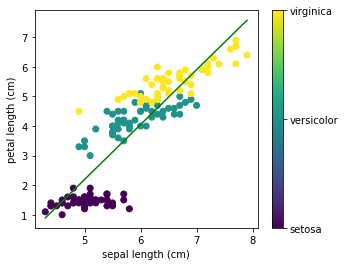

R squared = 0.7599553107783261


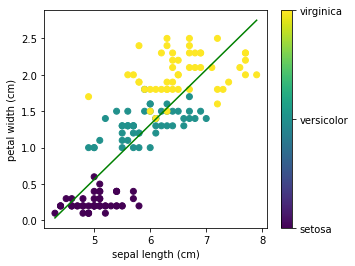

R squared = 0.6690481463418162


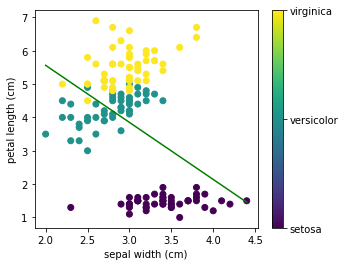

R squared = 0.1768337873324651


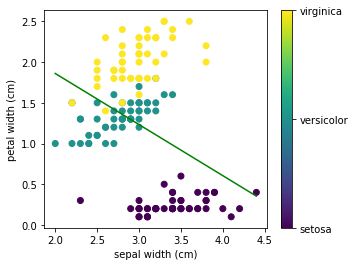

R squared = 0.12712368783853767


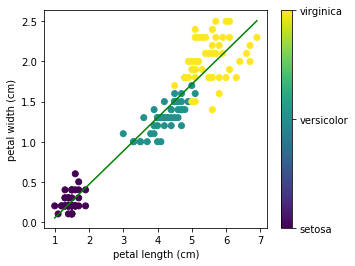

R squared = 0.9269012279220039


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
A =iris.data


#Iterate all feature combinations except the last one which is categorical
for j in range(0,A.shape[1]):
    x = A[:,j].astype(float) #feature j
    
    
    #We skip through comparisons we have already made
    for k in range(0,A.shape[1]):
        if(k<=j):
            continue
            
            
        y = A[:,k].astype(float) #feature k

        #Find coefficients w
        phi_zero = x**0
        phi_one = x**1
        phi = np.column_stack((phi_zero,phi_one))
        w = np.linalg.pinv(phi).dot(y)
        
      
        #Scatter plot with different color for each species
        x_index=j
        y_index=k
        
        formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

        plt.figure(figsize=(5, 4))
        plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
        plt.colorbar(ticks=[0, 1, 2], format=formatter)
        plt.xlabel(iris.feature_names[x_index])
        plt.ylabel(iris.feature_names[y_index])

        
        #Solve using the pseudoinverse
        
        Y = np.sort(x) 
        #the positions of the sorted elements in the unsorted array
        I = np.argsort(x) 
        
        y_line =np.dot(phi[I,:] ,w)
        plt.plot(x[I], y_line,'g')
        plt.show()

        #Calculate R squared
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        Sum1=np.sum((y_line-y_mean)**2)
        Sum2=np.sum((y-y_mean)**2)
      
        print("R squared =",Sum1/Sum2) 
        

R squared provides a measure of how well observed outcomes are replicated by the model.
As we can see from the last plot , *petal width* and *petal length* seem to have somewhat of a linear correlation and our regression line seems to represent that trend with good accuracy.Therefore, R squared has a high value of about 0.93.In the plot right above the one discussed,we have the *petal width* and *sepal width* data points which are obviously very poorly represented with our regression line so R squared comes out very small. 